It is also one of the Ensamble technique. In adaboost we were trying to increase the score or performance of the model via r2 or other method but when it comes to gradiant boosting we are not going to chase score we are going to chase residual(loss function/error). here we are going to try to reduce the error function. once error get reduced score may go up may be possible as we reducing most of the mistakes. Here we are trying to optimize or minimize the error function.

If data is not following any pattern the it is not possible to have good score say example during sale amazon sale goes upto 70% but during off season they may not have even 20% sale from the same customer so score will definately be affected.

All the time it's not possible to have good accuracy

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

Based on this data we will be going to predict whether the patient is heart patient or not

In [15]:
df = pd.read_csv('/Users/juhimishra/Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


GBDT can be used for both classification and regression problem. here for this problem we will be using for classification

In [16]:
df.shape

(303, 14)

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Here data is not imbalances as the number is not having much difference between them

In [34]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [35]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Outliers Detection (applies to continous data only)

In [18]:
df_features = df[['age','trestbps','chol','thalach']]

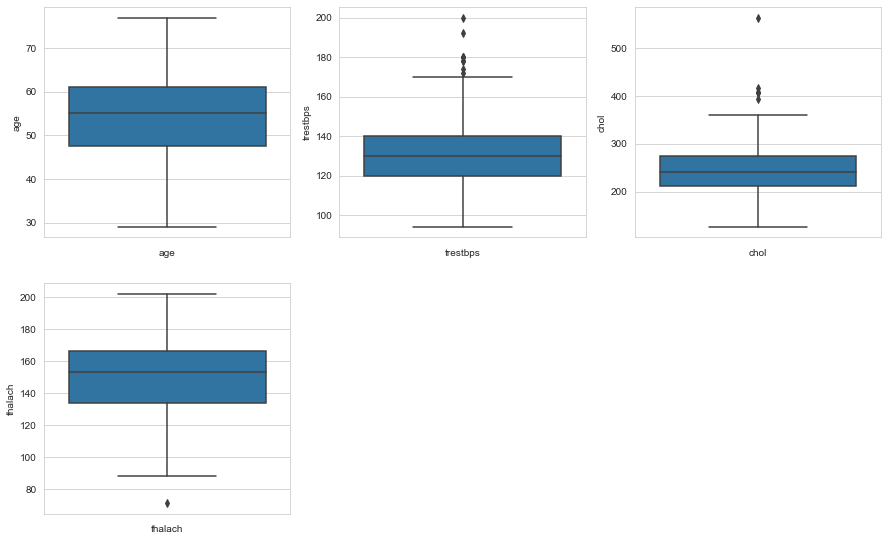

In [19]:
plt.figure(figsize=(15,50))

graph=1

for column in df_features:
    if graph<=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(y=df_features[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [38]:
# find the IQR (Inter Quantile Range) to identify ouliers

# 1st Quantile
q1 = df.quantile(0.25)

# 3rd Quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

## Outlier detection Formula

#### Higher side ===>Q3+(1.5*IQR)

#### Lower Side ===> Q1-(1.5*IQR)

Here Q3 and Q1 is considering all the feature

Calculating outliers for trestbps

In [39]:
out_trestbps = (q3.trestbps + (1.5*iqr.trestbps))
out_trestbps

170.0

anything above 170 is a outlier.

### Outlier Removal Higher Side using Numpy

In [40]:
index = np.where(df['trestbps']>out_trestbps)
index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266]),)

We got the result which is array is actually the index of data

In [13]:
df = df.drop(df.index[index])

In [23]:
df.shape

(294, 14)

once we remove the outliers so we need reset the index as we will not be going to disturb any other dataset because we are going to delete based on the index.

In [14]:
df.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Similarly we are doing for cholestrol as we did earlier for trestbps

In [15]:
index = np.where(df['chol']>(q3.chol+(1.5*iqr.chol)))
df = df.drop(df.index[index])
print ('shape -',df.shape)
df.reset_index()

shape - (289, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
285,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
286,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
287,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Here the outliers were upper side so >+

If the quantile outliers is upper side than use >+ and if it is lower side then <-. Here the Outliers in lower side so <-

In [41]:
index = np.where(df['thalach']<(q3.thalach-(1.5*iqr.thalach)))
df = df.drop(df.index[index])
print ('shape -',df.shape)
df.reset_index()

shape - (270, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
266,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
267,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
268,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [17]:
# Just find correlation of feature vs target using corrwith
df.drop('target',axis=1).corrwith(df.target)

age        -0.224175
sex        -0.290401
cp          0.386955
trestbps   -0.106477
chol       -0.104974
fbs        -0.029463
restecg     0.144472
thalach     0.393744
exang      -0.415471
oldpeak    -0.427428
slope       0.309297
ca         -0.362486
thal       -0.360661
dtype: float64

#### Visualize the correlation

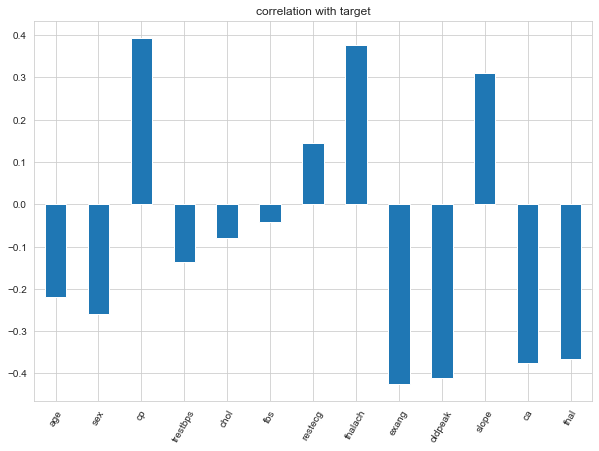

In [42]:
df.drop('target',axis =1).corrwith(df.target).plot(kind = 'bar', grid = True,figsize=(10,7), rot = 60,title = 'correlation with target')
plt.show()

##### Let's play around with feature selection and see if that can help us building better model

## Model building using SelectPercentile features

In [43]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

chi2(square) is almost equal to annova

when we apply chi2, we get p-values for all features. Based on the p-values, it will select top 80% of features

Example - if p-value < 0.05, it will reject null hypothesis. Default null hypothesis is, there is no relation b/w feature and target

In [44]:
# Instantiate SelectPercentile and fit (feature, label)
x = df.drop(['target'],axis=1)
y = df.target

spercentile = SelectPercentile(score_func=chi2, percentile = 80)

spercentile = spercentile.fit(x,y)

In [45]:
# separate the features to check p-values
cols = spercentile.get_support(indices=True)
features = x.columns[cols]

In [46]:
df_scores = pd.DataFrame({'features':x.columns,'chi2score': spercentile.scores_, 'pvalues': spercentile.pvalues_})
df_scores.sort_values(by = 'chi2score', ascending = True)

,features,chi2score,pvalues
5,fbs,0.398938,5.276381e-01
6,restecg,2.845505,9.162980e-02
12,thal,5.397543,2.016512e-02
1,sex,5.827113,1.578100e-02
10,slope,6.686847,9.712684e-03
3,trestbps,12.059208,5.153718e-04
4,chol,19.203938,1.174708e-05
0,age,20.112252,7.302736e-06
8,exang,34.316300,4.684418e-09
2,cp,43.212547,4.910478e-11


In [26]:
print(cols)
print (features)

[ 0  1  2  3  4  7  8  9 10 11]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [27]:
# Create subset of selected features
x = df[features]
y = df.target

In [47]:
# Import libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.25,random_state = 41)

## GradiantBosstingClassifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))

print ('===============Train Result============')

print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:.2f}%')
print('-------------------------------')
print(f'classification report :\n{gbdt_clf_report}')
print(f'confusion metrics :\n{confusion_matrix(y_train,pred)}\n')

#.................Test Score.....................

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print('\n=================Test Result=============')
print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')
print('_______________________________________')
print(f'classification report:\n{clf_report}')
print('_______________________________________')
print(f'confusion matrix: \n{confusion_matrix(y_test,pred)}\n')

      

===============Train Result============
Accuracy Score : 100.00%
-------------------------------
classification report :
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    84.0  118.0       1.0      202.0         202.0
confusion metrics :
[[ 84   0]
 [  0 118]]


=================Test Result=============
Accuracy Score : 75.00%
_______________________________________
classification report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.720000   0.767442      0.75   0.743721      0.747907
recall      0.642857   0.825000      0.75   0.733929      0.750000
f1-score    0.679245   0.795181      0.75   0.737213      0.747443
support    28.000000  40.000000      0.75  68.000000     68.000000
_______________________________________
confusion matrix: 
[[18 10]
 [ 7 33]]



## Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid_param = {
    'max_depth': range(4,12,2),
    'learning_rate' : np.arange(0.1,1,0.1),
    'min_samples_split' : range(4,8,2)
}

In [55]:
grid = GridSearchCV(gbdt_clf,param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [56]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 4, 'min_samples_split': 6}

In [62]:
gbdt_clf = GradientBoostingClassifier(
    max_depth=4,min_samples_split=6,learning_rate=0.02)
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))

print ('===============Train Result============')

print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:.2f}%')
print('-------------------------------')
print(f'classification report :\n{gbdt_clf_report}')
print(f'confusion metrics :\n{confusion_matrix(y_train,pred)}\n')

#.................Test Score.....................

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print('\n=================Test Result=============')
print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')
print('_______________________________________')
print(f'classification report:\n{clf_report}')
print('_______________________________________')
print(f'confusion matrix: \n{confusion_matrix(y_test,pred)}\n')


===============Train Result============
Accuracy Score : 98.02%
-------------------------------
classification report :
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.967213  0.980198    0.983607      0.980847
recall      0.952381    1.000000  0.980198    0.976190      0.980198
f1-score    0.975610    0.983333  0.980198    0.979472      0.980122
support    84.000000  118.000000  0.980198  202.000000    202.000000
confusion metrics :
[[ 80   4]
 [  0 118]]


=================Test Result=============
Accuracy Score : 76.47%
_______________________________________
classification report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.772727  0.764706   0.761364      0.763369
recall      0.642857   0.850000  0.764706   0.746429      0.764706
f1-score    0.692308   0.809524  0.764706   0.750916      0.761258
support    28.000000  40.000000  0.764706  68.000000     68.000000
__________________________

## Used Cars price prediction

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics and models
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

XGboost (extreme gradient boost) build trees parallaly unlike gb does sequentially. we should use this for huge data not for small data.

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in ./opt/anaconda3/lib/python3.8/site-packages (1.4.2)
Note: you may need to restart the kernel to use updated packages.


In [11]:
data = pd.read_csv('/Users/juhimishra/Downloads/Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
